# Stroke Prediction - Classification
> This notebook is for Kaggle's Playground Series Season 3, Episode 2: https://www.kaggle.com/competitions/playground-series-s3e2

**Table of Contents**
1. Import libraries and load datasets
2. Introduction to dataset
3. EDA
4. Feature Engineering
5. Model Building
6. Prediction

## Import libraries and load datasets

In [81]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Introduction to dataset
> These are multiple variables in dataset which can be divided into two categories:

**demographic information about patients**
`id`: unique identification number
`gender`: gender of patient
`age`: age of the patient
`ever_married`: whether patient was ever married
`work_type`: type of work of patient
`Residence_type`: type of residence of patient

**health related information for patients**
`hypertension`: whether patient has hypertension (0: no, 1: yes)
`heart_disease`: whether patient has heart disease (0: no, 1: yes)
`avg_glucose_level`: average glucose level of patient
`bmi`: body mass index of patient
`smoking_status`: smoking status of patient
`stroke`: target variable (0: no, 1: yes)

### General infromation about dataset

In [82]:
# first 5 instances of train dataset
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [83]:
# shape of train dataset
train.shape

(15304, 12)

In [84]:
# columns of train dataset
train.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### Variable Identification and Typecasting

In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


#### Integer Data Type

In [86]:
# identifying variables with integer datatype
train.dtypes[train.dtypes == 'int64']

id               int64
hypertension     int64
heart_disease    int64
stroke           int64
dtype: object

**Summary:**
- `id` is unique number assigned to patients. It is okay to be **integer datatype**
- `hypertension`, `heart_disease`, and `stroke` all need to be converted to **category datatype**.

#### Float Data Type

In [87]:
# identifying variables with float datatype
train.dtypes[train.dtypes == 'float64']

age                  float64
avg_glucose_level    float64
bmi                  float64
dtype: object

**Summary:**
- All variables are best represented by **float datatype**.

#### Object Data Type

In [88]:
# identifying non integer and float variables
train.dtypes[train.dtypes == 'object']

gender            object
ever_married      object
work_type         object
Residence_type    object
smoking_status    object
dtype: object

These variables are not recognized by Pandas.

In [89]:
# manually check object type
train[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']].head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,never smoked
1,Male,Yes,Private,Rural,formerly smoked
2,Female,Yes,Private,Rural,Unknown
3,Male,Yes,Private,Urban,never smoked
4,Female,No,Private,Rural,never smoked


**Summary**
All object type variables are **categorical variables**.

### Typecasting

#### Train Dataset

In [90]:
# integer datatype
train['hypertension'] = train['hypertension'].astype('category')
train['heart_disease'] = train['heart_disease'].astype('category')
train['stroke'] = train['stroke'].astype('category')

# object datatype
train['gender'] = train['gender'].astype('category')
train['ever_married'] = train['ever_married'].astype('category')
train['work_type'] = train['work_type'].astype('category')
train['Residence_type'] = train['Residence_type'].astype('category')
train['smoking_status'] = train['smoking_status'].astype('category')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 15304 non-null  int64   
 1   gender             15304 non-null  category
 2   age                15304 non-null  float64 
 3   hypertension       15304 non-null  category
 4   heart_disease      15304 non-null  category
 5   ever_married       15304 non-null  category
 6   work_type          15304 non-null  category
 7   Residence_type     15304 non-null  category
 8   avg_glucose_level  15304 non-null  float64 
 9   bmi                15304 non-null  float64 
 10  smoking_status     15304 non-null  category
 11  stroke             15304 non-null  category
dtypes: category(8), float64(3), int64(1)
memory usage: 599.1 KB


#### Test Dataset

In [91]:
# integer datatype
test['hypertension'] = test['hypertension'].astype('category')
test['heart_disease'] = test['heart_disease'].astype('category')

# object datatype
test['gender'] = test['gender'].astype('category')
test['ever_married'] = test['ever_married'].astype('category')
test['work_type'] = test['work_type'].astype('category')
test['Residence_type'] = test['Residence_type'].astype('category')
test['smoking_status'] = test['smoking_status'].astype('category')

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10204 entries, 0 to 10203
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 10204 non-null  int64   
 1   gender             10204 non-null  category
 2   age                10204 non-null  float64 
 3   hypertension       10204 non-null  category
 4   heart_disease      10204 non-null  category
 5   ever_married       10204 non-null  category
 6   work_type          10204 non-null  category
 7   Residence_type     10204 non-null  category
 8   avg_glucose_level  10204 non-null  float64 
 9   bmi                10204 non-null  float64 
 10  smoking_status     10204 non-null  category
dtypes: category(7), float64(3), int64(1)
memory usage: 389.8 KB


## Exploratory Data Analysis

### Univariate Analysis: Numerical Variables

In [92]:
train.select_dtypes(include=['int64','float64']).dtypes

id                     int64
age                  float64
avg_glucose_level    float64
bmi                  float64
dtype: object

In [93]:
print('Basic Statistical Information of Numerical Variables')
print(train[['id', 'age', 'avg_glucose_level', 'bmi']].describe())
print("{}".format("---"*20))
print('Skewness of Numerical Variables')
print(train[['id', 'age', 'avg_glucose_level', 'bmi']].skew())

Basic Statistical Information of Numerical Variables
                 id           age  avg_glucose_level           bmi
count  15304.000000  15304.000000       15304.000000  15304.000000
mean    7651.500000     41.417708          89.039853     28.112721
std     4418.028595     21.444673          25.476102      6.722315
min        0.000000      0.080000          55.220000     10.300000
25%     3825.750000     26.000000          74.900000     23.500000
50%     7651.500000     43.000000          85.120000     27.600000
75%    11477.250000     57.000000          96.980000     32.000000
max    15303.000000     82.000000         267.600000     80.100000
------------------------------------------------------------
Skewness of Numerical Variables
id                   0.000000
age                 -0.103579
avg_glucose_level    3.037242
bmi                  0.713051
dtype: float64


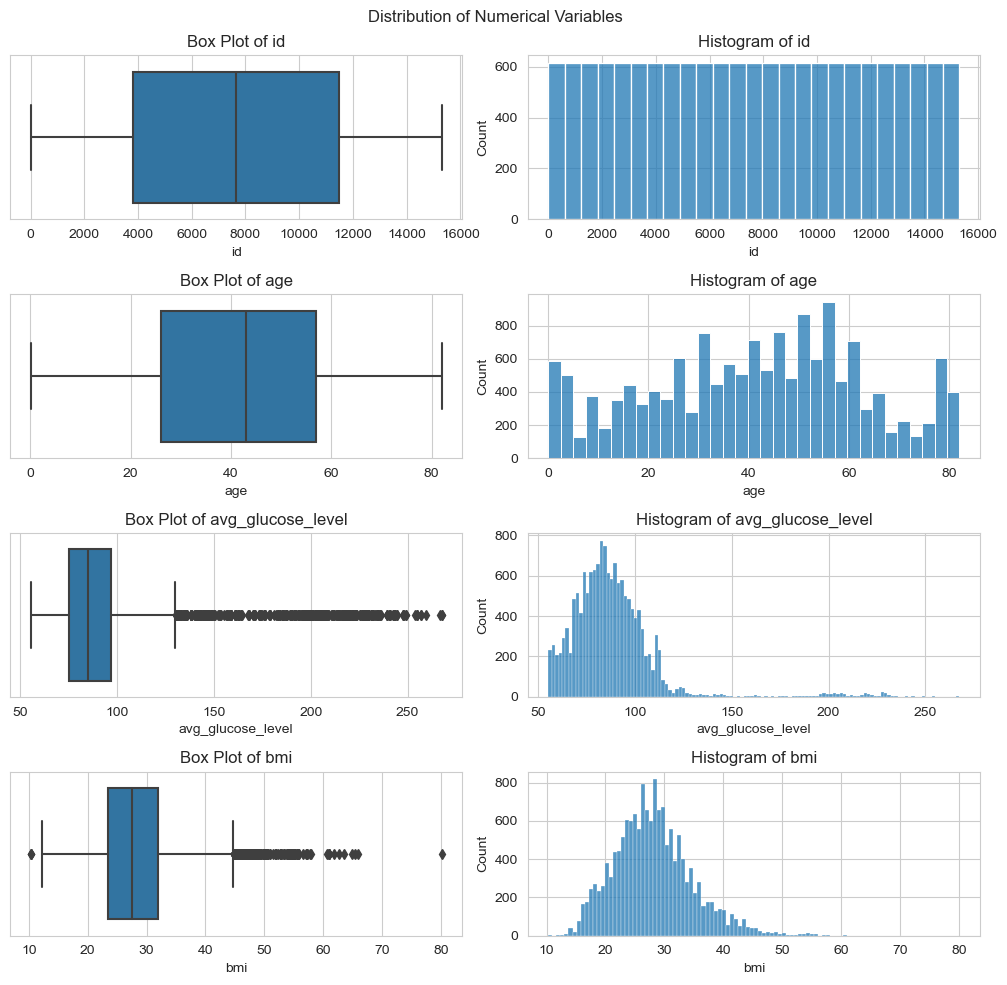

In [94]:
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(10,10))
fig.suptitle('Distribution of Numerical Variables')

ax[0, 0].set_title('Box Plot of id')
sns.boxplot(data=train, x='id', ax=ax[0, 0])

ax[0, 1].set_title('Histogram of id')
sns.histplot(data=train, x='id', ax=ax[0, 1])

ax[1, 0].set_title('Box Plot of age')
sns.boxplot(data=train, x='age', ax=ax[1, 0])

ax[1, 1].set_title('Histogram of age')
sns.histplot(data=train, x='age', ax=ax[1, 1])

ax[2, 0].set_title('Box Plot of avg_glucose_level')
sns.boxplot(data=train, x='avg_glucose_level', ax=ax[2, 0])

ax[2, 1].set_title('Histogram of avg_glucose_level')
sns.histplot(data=train, x='avg_glucose_level', ax=ax[2, 1])

ax[3, 0].set_title('Box Plot of bmi')
sns.boxplot(data=train, x='bmi', ax=ax[3, 0])

ax[3, 1].set_title('Histogram of bmi')
sns.histplot(data=train, x='bmi', ax=ax[3, 1])

fig.tight_layout()

#### Observation
`id` has unique value for every entry. So it does not have value for prediction
Distribution of `age` is close to Normal
There are high number of very young and old patients in `age` variable
`avg_glucose_level` and `bmi` are skewed

### Univariate Analysis: Categorical Variables

In [95]:
train.select_dtypes(exclude=['int64','float64']).dtypes

gender            category
hypertension      category
heart_disease     category
ever_married      category
work_type         category
Residence_type    category
smoking_status    category
stroke            category
dtype: object

In [96]:
cat_var = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

for var in cat_var:
    print('{}'.format(var))
    print(train[var].value_counts(normalize=True))
    print('{}'.format('---'*10))

gender
Female    0.617224
Male      0.382710
Other     0.000065
Name: gender, dtype: float64
------------------------------
hypertension
0    0.950274
1    0.049726
Name: hypertension, dtype: float64
------------------------------
heart_disease
0    0.976673
1    0.023327
Name: heart_disease, dtype: float64
------------------------------
ever_married
Yes    0.678581
No     0.321419
Name: ever_married, dtype: float64
------------------------------
work_type
Private          0.637219
children         0.133168
Self-employed    0.126699
Govt_job         0.100170
Never_worked     0.002744
Name: work_type, dtype: float64
------------------------------
Residence_type
Rural    0.500784
Urban    0.499216
Name: Residence_type, dtype: float64
------------------------------
smoking_status
never smoked       0.410416
Unknown            0.296850
formerly smoked    0.152705
smokes             0.140029
Name: smoking_status, dtype: float64
------------------------------
stroke
0    0.958704
1    0.0412

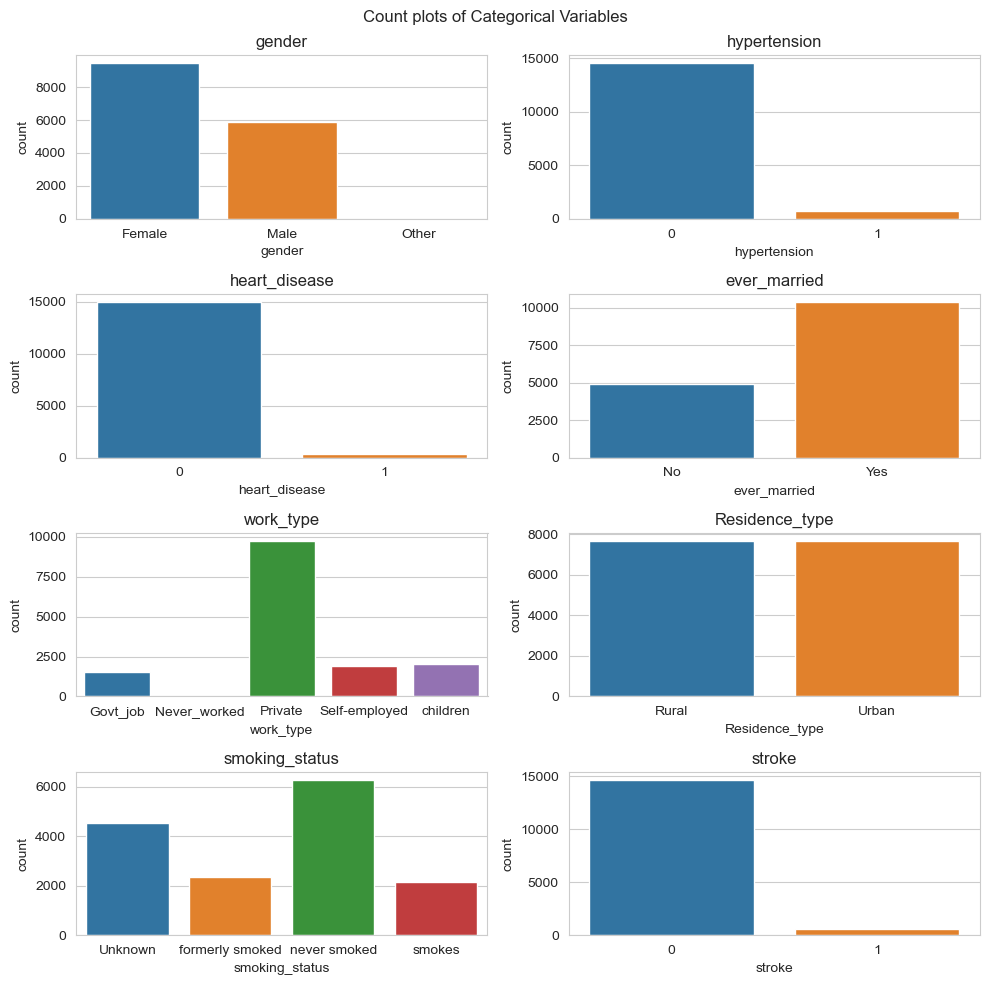

In [97]:
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(10,10))
fig.suptitle('Count plots of Categorical Variables')

ax[0, 0].set_title('gender')
sns.countplot(data=train, x='gender', ax=ax[0, 0])

ax[0, 1].set_title('hypertension')
sns.countplot(data=train, x='hypertension', ax=ax[0, 1])

ax[1, 0].set_title('heart_disease')
sns.countplot(data=train, x='heart_disease', ax=ax[1, 0])

ax[1, 1].set_title('ever_married')
sns.countplot(data=train, x='ever_married', ax=ax[1, 1])

ax[2, 0].set_title('work_type')
sns.countplot(data=train, x='work_type', ax=ax[2, 0])

ax[2, 1].set_title('Residence_type')
sns.countplot(data=train, x='Residence_type', ax=ax[2, 1])

ax[3, 0].set_title('smoking_status')
sns.countplot(data=train, x='smoking_status', ax=ax[3, 0])

ax[3, 1].set_title('stroke')
sns.countplot(data=train, x='stroke', ax=ax[3, 1])

fig.tight_layout()

#### Observation

1. There are low rates of patients with `hypertension`, `heart_disease`, `stroke`
2. Majority of patients work privately
3. Majority of patients were once married or currently married
4. Majority of patients never smoked
5. There are similar number of rural and urban residents

### Bivariate analysis: Numerical-Numerical